#A SAMPLE PROGRAM: ANOMALY DETECTION IN IoT NETWORKS
##Cadidate: Doan Nguyen



In this sample program, I will demonstrate an anomaly detection task using an autoencoder-based neural network to identify cyberattacks on IoT devices by analysing network traffic data. This approach aligns with key research areas such as AI-driven cybersecurity, network management, and data analytics for cybersecurity, which are emphasized in the AI and Cyber Security program at Victoria University.

###Technologies and Tools
This program integrates AI techniques and cybersecurity methodologies, contributing to the program’s research and teaching in AI-driven security operations, vulnerability analysis, and enterprise security management. The following tools and frameworks are utilized:

•	Python – The programming language used to implement the analysis.

•	TensorFlow – A deep learning framework for building and training the autoencoder model.

•	Autoencoder Neural Network – A model that learns to compress and reconstruct network traffic data to detect anomalies.

•	MSLE (Mean Squared Logarithmic Error) – The loss function for measuring reconstruction errors.

•	Scikit-learn – Used for data preprocessing and evaluation.

###Dataset and Context
I will utilize the N-BaIoT dataset, a benchmark dataset for evaluating Anomaly Detection Systems in IoT environments. This dataset, derived from research by Meidan et al. (2018), consists of network traffic data from various IoT devices under both benign conditions and two major cyberattacks: Mirai and Bashlite. This provides a practical foundation for exploring AI applications in cybersecurity, a key focus of the IT Program at Victoria University.

Reference: Y. Meidan et al., “N-BaIoT—Network-Based Detection of IoT Botnet Attacks Using Deep Autoencoders,” IEEE Pervasive Computing, vol. 17, no. 3, pp. 12–22, 2018.

# WORKFLOW
1. Load data
2. Preprocessing
3. Create an autoencoder model
4. Train the model
5. Find thresholds
6. Detect Anomalies
7. Save the model



# 1. Load data

Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#print(tf.__version__)


The N-BaIoT dataset contains data from nine IoT devices. In this program, any one of them will be selected for analysis.

In [ ]:
# Select the IoT device

IoT_device = 'Danmini_Doorbell'
#IoT_device = 'Ecobee_Thermostat'
#IoT_device = 'Ennio_Doorbell'
#IoT_device = 'Philips_B120N10_Baby_Monitor'
#IoT_device = 'Provision_PT_737E_Security_Camera'
#IoT_device = 'Provision_PT_838_Security_Camera'
#IoT_device = 'Samsung_SNH_1011_N_Webcam'
#IoT_device = 'SimpleHome_XCS7_1002_WHT_Security_Camera'
#IoT_device = 'SimpleHome_XCS7_1003_WHT_Security_Camera'

print(IoT_device, 'selected')

Danmini_Doorbell selected


### Load normal data

In [ ]:
# BENIGN
benign_data = pd.read_csv('../'+ IoT_device+ '/benign_traffic.csv', quotechar='"')

print("benign shape:", benign_data.shape)

benign shape: (49548, 115)


### Load MIRAI ATTACKS data

In [ ]:
#MIRAI ATTACKS:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    #1.ack
    mirai_ack_data = pd.read_csv('../'+ IoT_device+ '/mirai_attacks/ack.csv',quotechar='"')

    #2.scan
    mirai_scan_data = pd.read_csv('../'+ IoT_device+ '/mirai_attacks/scan.csv',quotechar='"')

    #3.syn
    mirai_syn_data = pd.read_csv('../'+ IoT_device+ '/mirai_attacks/syn.csv',quotechar='"')

    #4.udp
    mirai_udp_data = pd.read_csv('../'+ IoT_device+ '/mirai_attacks/udp.csv',quotechar='"')

    #5.udpplain
    mirai_udpplain_data = pd.read_csv('../'+ IoT_device+ '/mirai_attacks/udpplain.csv',quotechar='"')

    print("mirai_ack shape:", mirai_ack_data.shape)
    print("mirai_scan shape:", mirai_scan_data.shape)
    print("mirai_syn shape:", mirai_syn_data.shape)
    print("mirai_udp shape:", mirai_udp_data.shape)
    print("mirai_udpplain shape:", mirai_udpplain_data.shape)

else:
    print ('No MIRAI ATTACKS data for', IoT_device)


mirai_ack shape: (102195, 115)
mirai_scan shape: (107685, 115)
mirai_syn shape: (122573, 115)
mirai_udp shape: (237665, 115)
mirai_udpplain shape: (81982, 115)


### Load BASHLITE ATTACKS data



In [ ]:
#BASHLITE ATTACKS:
#1.combo
gafgyt_combo_data = pd.read_csv('../'+ IoT_device+ '/gafgyt_attacks/combo.csv',quotechar='"')

#2.junk
gafgyt_junk_data = pd.read_csv('../'+ IoT_device+ '/gafgyt_attacks/junk.csv',quotechar='"')

#3.scan
gafgyt_scan_data = pd.read_csv('../'+ IoT_device+ '/gafgyt_attacks/scan.csv',quotechar='"')

#4.tcp
gafgyt_tcp_data = pd.read_csv('../'+ IoT_device+ '/gafgyt_attacks/tcp.csv',quotechar='"')

#5.udp
gafgyt_udp_data = pd.read_csv('../'+ IoT_device+ '/gafgyt_attacks/udp.csv',quotechar='"')


print("gafgyt_combo_data shape:", gafgyt_combo_data.shape)
print("gafgyt_junk_data shape:", gafgyt_junk_data.shape)
print("gafgyt_scan_data shape:", gafgyt_scan_data.shape)
print("gafgyt_tcp_data shape:", gafgyt_tcp_data.shape)
print("gafgyt_udp_data shape:", gafgyt_udp_data.shape)

gafgyt_combo_data shape: (59718, 115)
gafgyt_junk_data shape: (29068, 115)
gafgyt_scan_data shape: (29849, 115)
gafgyt_tcp_data shape: (92141, 115)
gafgyt_udp_data shape: (105874, 115)


# 2. Preprocessing

### Check for any  null values

In [ ]:
#check for any  nullvalues

print("benign_data: ",benign_data.isnull().values.any() )

if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    print("mirai_ack_data: ",mirai_ack_data.isnull().values.any() )
    print("mirai_scan_data: ",mirai_scan_data.isnull().values.any() )
    print("mirai_syn_data: ",mirai_syn_data.isnull().values.any() )
    print("mirai_udp_data: ",mirai_udp_data.isnull().values.any() )
    print("mirai_udpplain_data: ",mirai_udpplain_data.isnull().values.any() )


print("gafgyt_combo_data: ",gafgyt_combo_data.isnull().values.any() )
print("gafgyt_junk_data: ",gafgyt_junk_data.isnull().values.any() )
print("gafgyt_scan_data: ",gafgyt_scan_data.isnull().values.any() )
print("gafgyt_tcp_data: ",gafgyt_tcp_data.isnull().values.any() )
print("gafgyt_udp_data: ",gafgyt_udp_data.isnull().values.any() )



benign_data:  False
mirai_ack_data:  False
mirai_scan_data:  False
mirai_syn_data:  False
mirai_udp_data:  False
mirai_udpplain_data:  False
gafgyt_combo_data:  False
gafgyt_junk_data:  False
gafgyt_scan_data:  False
gafgyt_tcp_data:  False
gafgyt_udp_data:  False


### Split normal data.
The normal data will be assigned the label 0.

In [ ]:
#label: 0 = nomal
tmp_df = benign_data.copy()
tmp_df["label"]=0
benign_data_label = tmp_df["label"]

#split  benign_data
x_train, x_test, y_train, y_test = train_test_split(
    benign_data, benign_data_label, test_size=0.1, stratify=benign_data_label)

del tmp_df

### Asign labels to MIRAI ATTACKS data.
The attacks data will be assigned the labe 1

In [ ]:
#label: 1 = anomaly
#ack:
tmp_df = mirai_ack_data.copy()
tmp_df["label"]=1
mirai_ack_data_label = tmp_df["label"]

#scan:
tmp_df = mirai_scan_data.copy()
tmp_df["label"]=1
mirai_scan_data_label = tmp_df["label"]

#syn:
tmp_df = mirai_syn_data.copy()
tmp_df["label"]=1
mirai_syn_data_label = tmp_df["label"]

#udp:
tmp_df = mirai_udp_data.copy()
tmp_df["label"]=1
mirai_udp_data_label = tmp_df["label"]

#udpplain:
tmp_df = mirai_udpplain_data.copy()
tmp_df["label"]=1
mirai_udpplain_data_label = tmp_df["label"]


del tmp_df

### Asign labels to BASHLITE ATTACKS data

In [ ]:
#label: 1 = anomaly
#combo:
tmp_df = gafgyt_combo_data.copy()
tmp_df["label"]=1
gafgyt_combo_data_label = tmp_df["label"]

#junk:
tmp_df = gafgyt_junk_data.copy()
tmp_df["label"]=1
gafgyt_junk_data_label = tmp_df["label"]

#scan:
tmp_df = gafgyt_scan_data.copy()
tmp_df["label"]=1
gafgyt_scan_data_label = tmp_df["label"]

#tcp:
tmp_df = gafgyt_tcp_data.copy()
tmp_df["label"]=1
gafgyt_tcp_data_label = tmp_df["label"]

#udp:
tmp_df = gafgyt_udp_data.copy()
tmp_df["label"]=1
gafgyt_udp_data_label = tmp_df["label"]


del tmp_df

# 3. Create an autoencoder model

An autoencoder (AE) is an artificial neural network used for anomaly detection by learning efficient representations of normal data. It consists of an encoder that compresses input data into a lower-dimensional form and a decoder that reconstructs the original data from the compressed representation, as shown in the folowing figure.

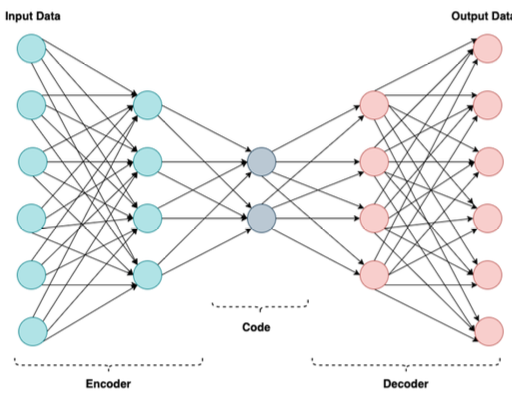

The model is trained on normal network traffic so that it can accurately reconstruct typical patterns. If the reconstruction error exceeds a predefined threshold, the data is classified as anomalous, indicating potential cyber threats or irregular activity. This approach is widely used in anomaly detection systems.

In [ ]:
#Create the layers & nodes
encoder_layers = []
decoder_layers = []
min_nodes = 70
max_nodes = 115
for x in range(min_nodes, max_nodes):
    encoder_layers.append(x)
    decoder_layers.append(x)

encoder_layers.reverse()
decoder_layers.remove(min_nodes)

print ('encoder:',encoder_layers)
print ('decoder:',decoder_layers)

encoder: [114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70]
decoder: [71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]


In [ ]:
def create_autoencode_model(x_train, encoder_layers, decoder_layers):

    model = tf.keras.models.Sequential()      # Create a new sequential model

    input_dimension = x_train.shape[1]


    #activation_fn = 'relu'
    activation_fn = 'softplus'

    #https://keras.io/api/layers/activations/
    # input Layer
    model.add(tf.keras.layers.Flatten(input_shape=(input_dimension,)))

    # encoder
    for i in range(len(encoder_layers)):
        n_nodes=encoder_layers[i]
        model.add(tf.keras.layers.Dense(n_nodes, activation=activation_fn, name='encoder-dense-'+str(n_nodes)+'-'+ activation_fn))
    print (n_nodes)

    # decoder
    for i in range(len(decoder_layers)):
        n_nodes=decoder_layers[i]
        model.add(tf.keras.layers.Dense(n_nodes, activation=activation_fn, name='decoder-dense-'+str(n_nodes)+'-'+ activation_fn))
    print (n_nodes)

    # (output Layer)
    model.add(tf.keras.layers.Dense(input_dimension, activation=activation_fn, name='output-dense-'+str(input_dimension)+'-'+ activation_fn)) # determines probability of each of the 10 classes


    return model


In [ ]:
model = create_autoencode_model(x_train, encoder_layers, decoder_layers)
model.summary()


70
114
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 115)               0         
_________________________________________________________________
encoder-dense-114-softplus ( (None, 114)               13224     
_________________________________________________________________
encoder-dense-113-softplus ( (None, 113)               12995     
_________________________________________________________________
encoder-dense-112-softplus ( (None, 112)               12768     
_________________________________________________________________
encoder-dense-111-softplus ( (None, 111)               12543     
_________________________________________________________________
encoder-dense-110-softplus ( (None, 110)               12320     
_________________________________________________________________
encoder-dense-109-softplus ( (None, 109)         

# 4. Train the model

### Compile the model

In [ ]:
#Cdefines the loss function, the optimizer and the metrics.
#loss_function = tf.keras.losses.mean_squared_logarithmic_error

#loss_function = tf.keras.losses.MSLE
#loss_function = tf.keras.losses.MSE

loss_function = tf.keras.losses.MSLE
model.compile(optimizer='adam',
              loss=loss_function,
#              metrics=['accuracy'])
#              metrics=['mse'])
              metrics=['msle'])


# loss='mse' https://towardsdatascience.com/autoencoder-neural-network-for-anomaly-detection-with-unlabeled-dataset-af9051a048


Available optimizers
SGD
RMSprop
Adam
Adadelta
Adagrad
Adamax
Nadam
Ftrl

Available losses
https://keras.io/api/losses/


### Train the model

The model will be trained on normal data.

In [ ]:
train_history = model.fit(
    x_train,
    x_train,
    epochs=100,
    #batch_size=512,
    validation_data=(x_test, x_test)
)


Epoch 1/100
1394/1394 [==============================] - 19s 12ms/step - loss: 1.7148 - msle: 1.7148 - val_loss: 1.6483 - val_msle: 1.6483
Epoch 2/100
1394/1394 [==============================] - 16s 11ms/step - loss: 1.6299 - msle: 1.6299 - val_loss: 1.6376 - val_msle: 1.6376
Epoch 3/100
1394/1394 [==============================] - 16s 11ms/step - loss: 1.6143 - msle: 1.6143 - val_loss: 1.6031 - val_msle: 1.6031
Epoch 4/100
1394/1394 [==============================] - 17s 12ms/step - loss: 1.5701 - msle: 1.5701 - val_loss: 1.5691 - val_msle: 1.5691
Epoch 5/100
1394/1394 [==============================] - 16s 12ms/step - loss: 1.5525 - msle: 1.5525 - val_loss: 1.5649 - val_msle: 1.5649
Epoch 6/100
1394/1394 [==============================] - 16s 12ms/step - loss: 1.5388 - msle: 1.5388 - val_loss: 1.5455 - val_msle: 1.5455
Epoch 7/100
1394/1394 [==============================] - 16s 11ms/step - loss: 1.5301 - msle: 1.5301 - val_loss: 1.5413 - val_msle: 1.5413
Epoch 8/100
1394/1394 [====

1394/1394 [==============================] - 17s 12ms/step - loss: 1.5242 - msle: 1.5242 - val_loss: 1.5381 - val_msle: 1.5381
Epoch 60/100
1394/1394 [==============================] - 17s 12ms/step - loss: 1.5242 - msle: 1.5242 - val_loss: 1.5378 - val_msle: 1.5378
Epoch 61/100
1394/1394 [==============================] - 16s 12ms/step - loss: 1.5242 - msle: 1.5242 - val_loss: 1.5395 - val_msle: 1.5395
Epoch 62/100
1394/1394 [==============================] - 16s 12ms/step - loss: 1.5242 - msle: 1.5242 - val_loss: 1.5383 - val_msle: 1.5383
Epoch 63/100
1394/1394 [==============================] - 17s 12ms/step - loss: 1.5243 - msle: 1.5243 - val_loss: 1.5383 - val_msle: 1.5383
Epoch 64/100
1394/1394 [==============================] - 17s 12ms/step - loss: 1.5242 - msle: 1.5242 - val_loss: 1.5380 - val_msle: 1.5380
Epoch 65/100
1394/1394 [==============================] - 17s 12ms/step - loss: 1.5242 - msle: 1.5242 - val_loss: 1.5377 - val_msle: 1.5377
Epoch 66/100
1394/1394 [=========

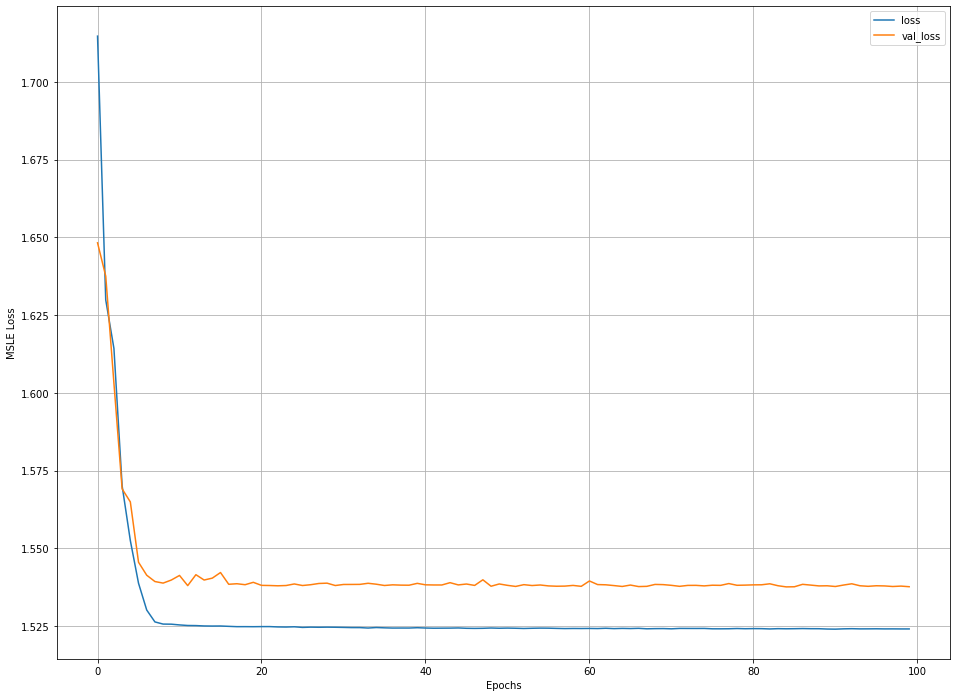

In [ ]:
plt.figure(figsize=(16, 12))
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

### Evaluate  the trained model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, x_test, verbose=0)
#verbose=0 will show you nothing (silent)
#verbose=1 will show you an animated progress bar
#verbose=2 will just mention the number of epoch

#print('max training accuracy:', max(train_history.history['accuracy']), '  test accuracy:', test_acc)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 1.5376417636871338
Test accuracy: 1.5376417636871338


# 5. Find thresholds
A threshold will be used to distinguish between normal and abnormal data. If the trained autoencoder model reconstructs the data with an accuracy above this threshold, it is classified as normal; otherwise, it is considered abnormal. This is because the autoencoder is designed to reconstruct normal data effectively. When the reconstruction accuracy is low, it indicates that the input deviates from the learned normal patterns, signaling an anomaly.

The following visualization illustrates the reconstruction accuracy of normal data using MSLE (Mean Squared Logarithmic Error).



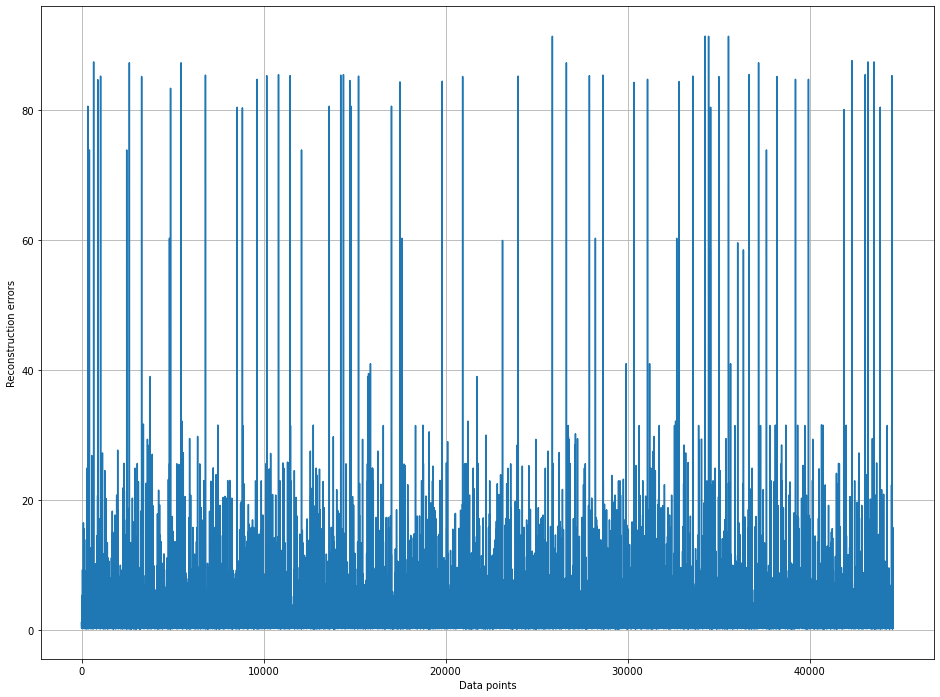

In [ ]:
x_train_reconstruction = model.predict(x_train)
# provides losses of individual instances
x_train_reconstruction_errors = tf.keras.losses.msle(x_train_reconstruction, x_train)

plt.figure(figsize=(16, 12))
plt.plot(x_train_reconstruction_errors)
plt.xlabel('Data points')
plt.ylabel('Reconstruction errors')
plt.grid()
plt.show()


Here, the threshold is determined based on the assumption that 1% of the normal data may be classified as abnormal. As we can see, the selected reconstruction error threshold is 17.3656.

In [ ]:
#percentile
threshold = np.percentile(x_train_reconstruction_errors, 99)
print('99 percentiles of the training data: ',threshold)

99 percentiles of the training data:  17.365639985624497


In [ ]:
#threshold_2 = np.mean(x_train_reconstruction_errors.numpy()) + np.std(x_train_reconstruction_errors.numpy())
#threshold_2

# 6. Detect Anomalies

In [ ]:
from sklearn.metrics import accuracy_score

def get_prediction_label(prediction_error, selected_threshold):
    prediction_mask = pd.Series(prediction_error) > selected_threshold
    # 0 = anomal, 1 = normaly
    prediction_label = prediction_mask.map(lambda x: 1.0 if x == True else 0.0)
    return prediction_label


### MIRAI ATTACKS

### mirai_ack_data

The following test assesses the model's ability to detect MIRAI_ack attacks. As shown in the visualization, most reconstruction errors for these attacks exceed the selected threshold, indicating a high detection accuracy for this type of attack.

mirai_ack_data_accuracy_score_prediction:  0.9999902147854591


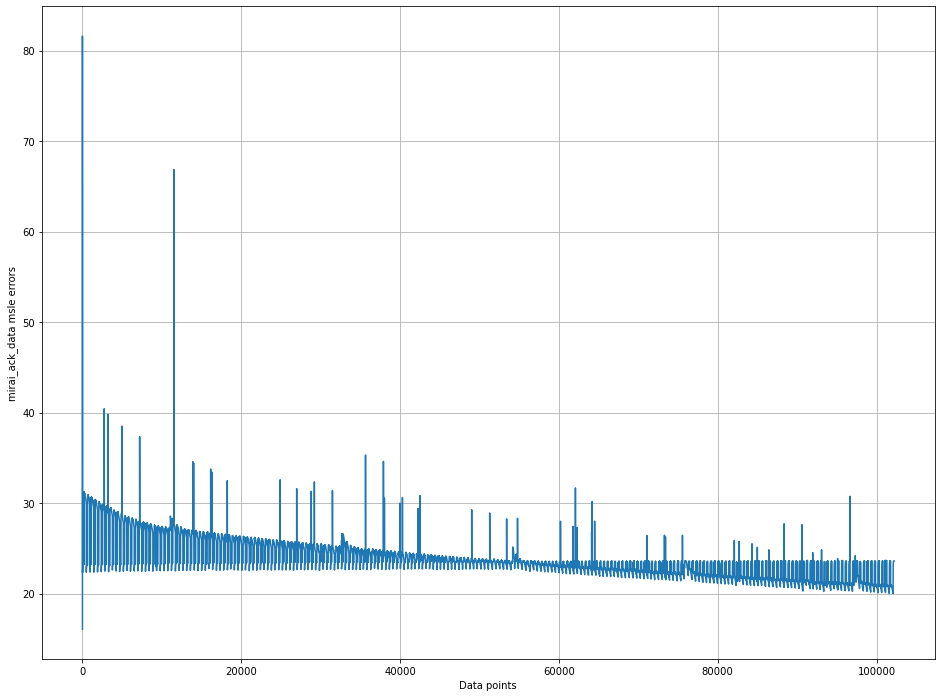

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_ack_data_prediction= model.predict(mirai_ack_data)

    mirai_ack_data_prediction_error= tf.keras.losses.msle(mirai_ack_data_prediction, mirai_ack_data)

    mirai_ack_data_prediction_label=get_prediction_label(mirai_ack_data_prediction_error, threshold)

    mirai_ack_data_accuracy_score=accuracy_score(mirai_ack_data_prediction_label, mirai_ack_data_label)

    print ('mirai_ack_data_accuracy_score_prediction: ', mirai_ack_data_accuracy_score)

    plt.figure(figsize=(16, 12))
    plt.plot(mirai_ack_data_prediction_error)
    plt.xlabel('Data points')
    plt.ylabel('mirai_ack_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)


### mirai_scan_data

The following test assesses the model's ability to detect MIRAI_scan attacks. As shown in the visualization, most reconstruction errors for these attacks fall below the selected threshold, indicating that the model is unable to effectively identify this type of attack.

mirai_scan_data_accuracy_score_prediction:  0.030032037888285276


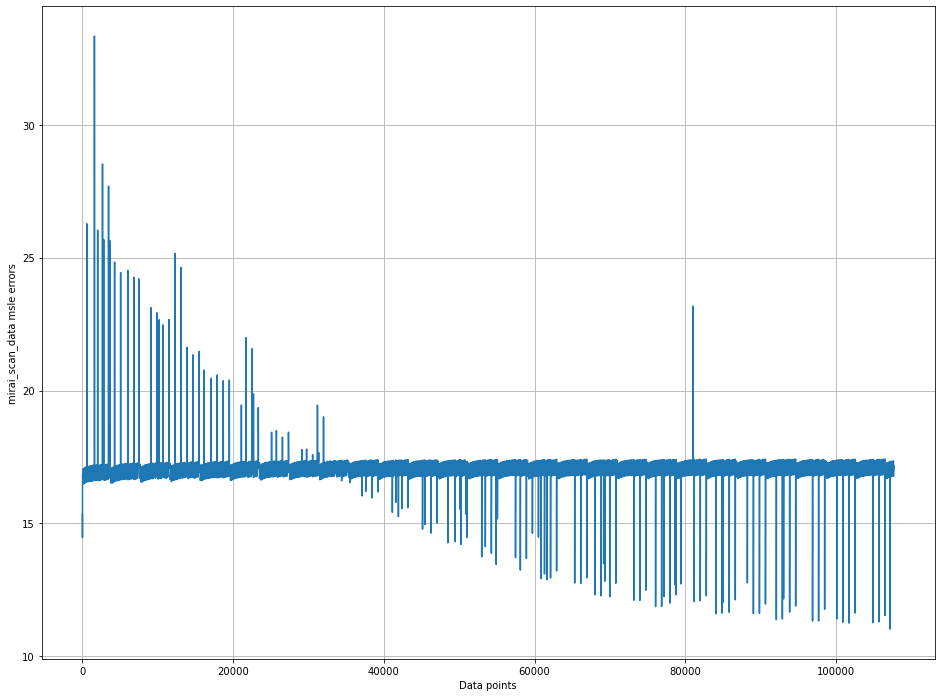

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_scan_data_prediction= model.predict(mirai_scan_data)

    mirai_scan_data_prediction_error= tf.keras.losses.msle(mirai_scan_data_prediction, mirai_scan_data)

    mirai_scan_data_prediction_label=get_prediction_label(mirai_scan_data_prediction_error, threshold)

    mirai_scan_data_accuracy_score=accuracy_score(mirai_scan_data_prediction_label, mirai_scan_data_label)

    print ('mirai_scan_data_accuracy_score_prediction: ', mirai_scan_data_accuracy_score)

    plt.figure(figsize=(16, 12))
    plt.plot(mirai_scan_data_prediction_error)
    plt.xlabel('Data points')
    plt.ylabel('mirai_scan_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### mirai_syn_data

The model can detect MIRAI_syn attacks approximately half of the time.

mirai_syn_data_accuracy_score_prediction:  0.5698481721096815


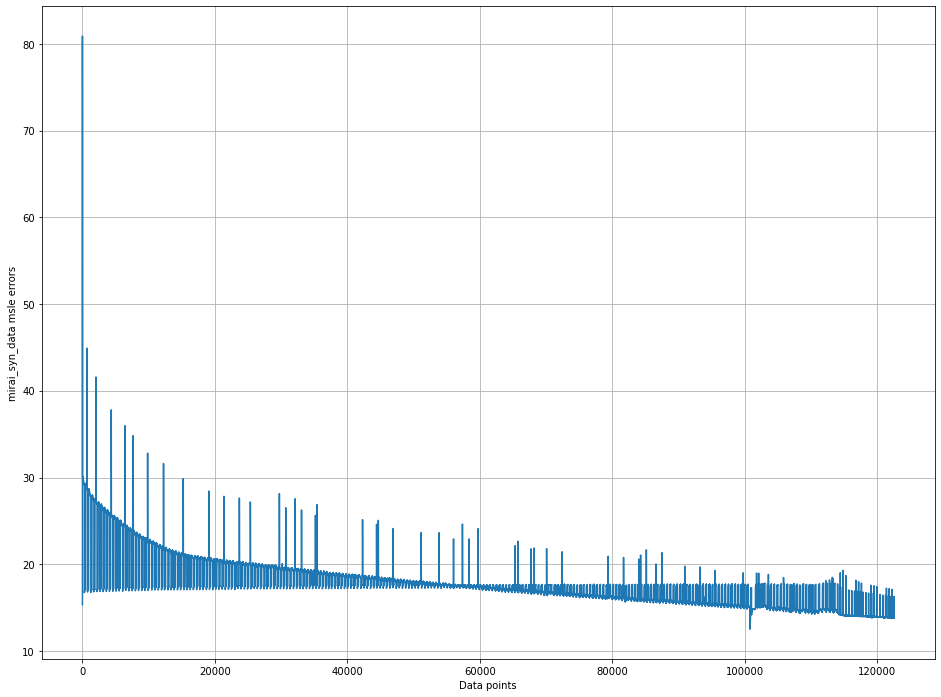

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):
    mirai_syn_data_prediction= model.predict(mirai_syn_data)

    mirai_syn_data_prediction_error= tf.keras.losses.msle(mirai_syn_data_prediction, mirai_syn_data)

    mirai_syn_data_prediction_label=get_prediction_label(mirai_syn_data_prediction_error, threshold)

    mirai_syn_data_accuracy_score=accuracy_score(mirai_syn_data_prediction_label, mirai_syn_data_label)

    print ('mirai_syn_data_accuracy_score_prediction: ', mirai_syn_data_accuracy_score)

    plt.figure(figsize=(16, 12))
    plt.plot(mirai_syn_data_prediction_error)
    plt.xlabel('Data points')
    plt.ylabel('mirai_syn_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### mirai_udp_data

The model demonstrates high accuracy in detecting MIRAI_udp attacks.

mirai_udp_data_accuracy_score_prediction:  0.9993856899417247


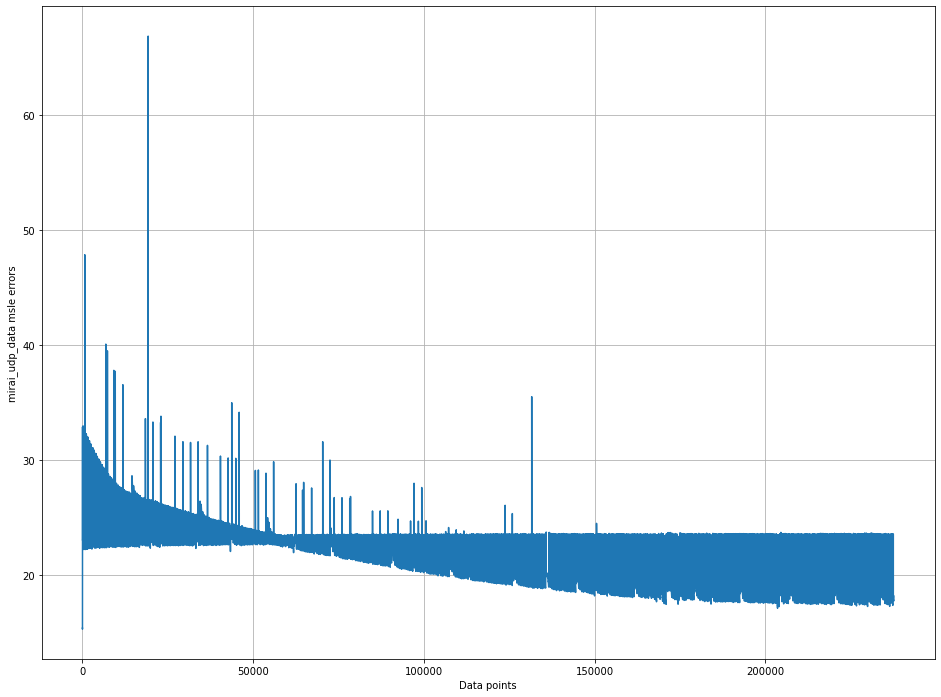

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_udp_data_prediction= model.predict(mirai_udp_data)

    mirai_udp_data_prediction_error= tf.keras.losses.msle(mirai_udp_data_prediction, mirai_udp_data)

    mirai_udp_data_prediction_label=get_prediction_label(mirai_udp_data_prediction_error, threshold)

    mirai_udp_data_accuracy_score=accuracy_score(mirai_udp_data_prediction_label, mirai_udp_data_label)

    print ('mirai_udp_data_accuracy_score_prediction: ', mirai_udp_data_accuracy_score)

    plt.figure(figsize=(16, 12))
    plt.plot(mirai_udp_data_prediction_error)
    plt.xlabel('Data points')
    plt.ylabel('mirai_udp_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### mirai_udpplain_data

The model demonstrates high accuracy in detecting MIRAI_udpplain attacks.

mirai_udpplain_data_accuracy_score_prediction:  0.999987802200483


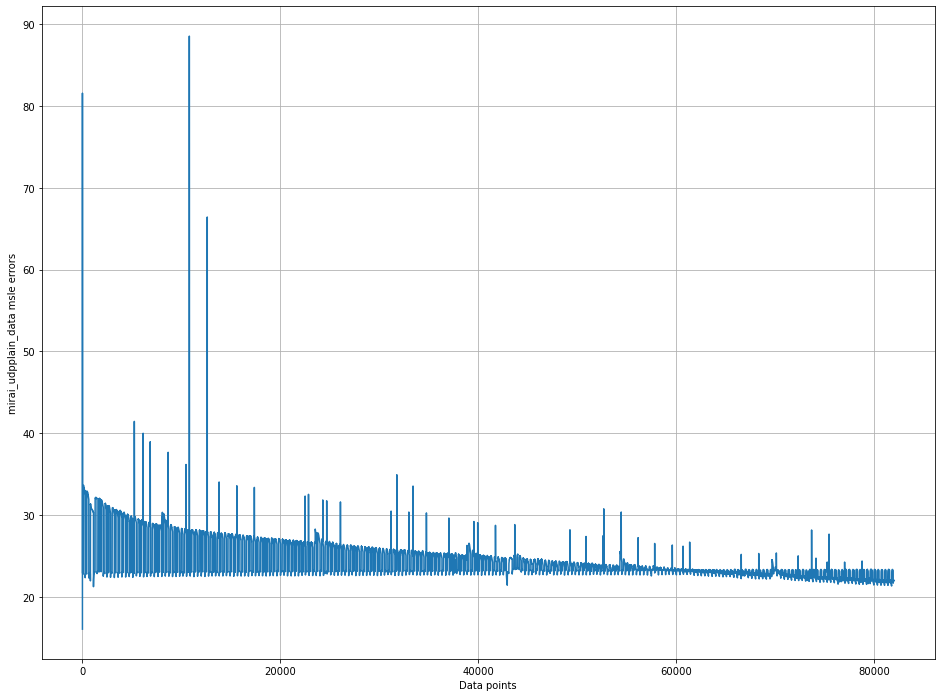

In [ ]:
if (IoT_device!='Ennio_Doorbell') and (IoT_device!='Samsung_SNH_1011_N_Webcam'):

    mirai_udpplain_data_prediction= model.predict(mirai_udpplain_data)

    mirai_udpplain_data_prediction_error= tf.keras.losses.msle(mirai_udpplain_data_prediction, mirai_udpplain_data)

    mirai_udpplain_data_prediction_label=get_prediction_label(mirai_udpplain_data_prediction_error, threshold)

    mirai_udpplain_data_accuracy_score=accuracy_score(mirai_udpplain_data_prediction_label, mirai_udpplain_data_label)

    print ('mirai_udpplain_data_accuracy_score_prediction: ', mirai_udpplain_data_accuracy_score)

    plt.figure(figsize=(16, 12))
    plt.plot(mirai_udpplain_data_prediction_error)
    plt.xlabel('Data points')
    plt.ylabel('mirai_udpplain_data msle errors')
    plt.grid()
    plt.show()

else:
    print ('No MIRAI ATTACKS data for', IoT_device)

### BASHLITE ATTACKS

### gafgyt_combo_data

The model demonstrates high accuracy in detecting this type of attacks.

gafgyt_combo_data_accuracy_score_prediction:  0.9999162731504739


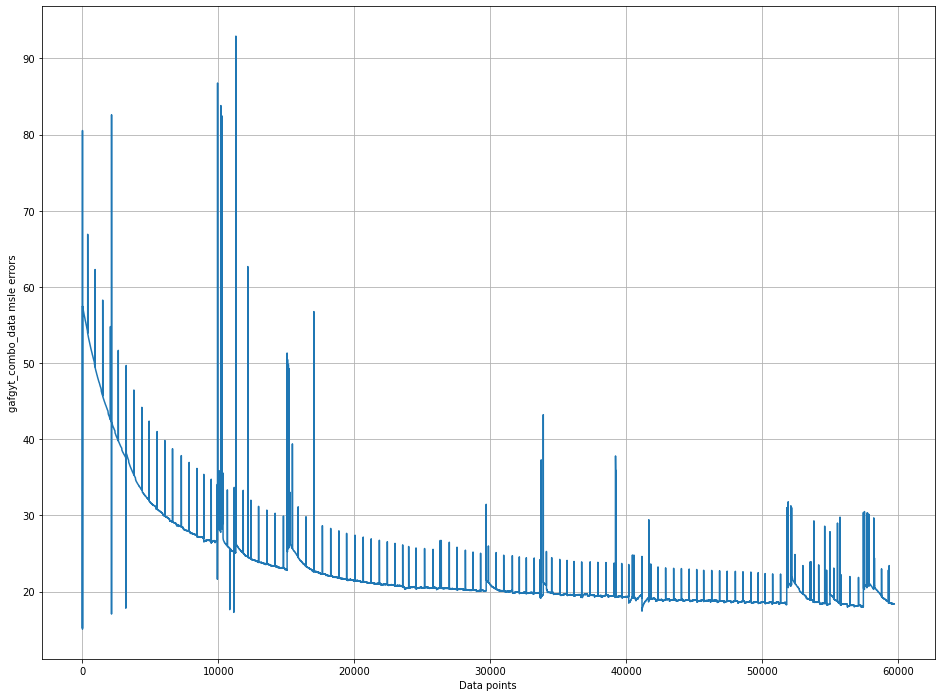

In [ ]:
gafgyt_combo_data_prediction= model.predict(gafgyt_combo_data)

gafgyt_combo_data_prediction_error= tf.keras.losses.msle(gafgyt_combo_data_prediction, gafgyt_combo_data)

gafgyt_combo_data_prediction_label=get_prediction_label(gafgyt_combo_data_prediction_error, threshold)

gafgyt_combo_data_accuracy_score=accuracy_score(gafgyt_combo_data_prediction_label, gafgyt_combo_data_label)

print ('gafgyt_combo_data_accuracy_score_prediction: ', gafgyt_combo_data_accuracy_score)

plt.figure(figsize=(16, 12))
plt.plot(gafgyt_combo_data_prediction_error)
plt.xlabel('Data points')
plt.ylabel('gafgyt_combo_data msle errors')
plt.grid()
plt.show()

### gafgyt_junk_data

The model demonstrates high accuracy in detecting this type of attacks.

gafgyt_junk_data_accuracy_score_prediction:  0.9998279895417641


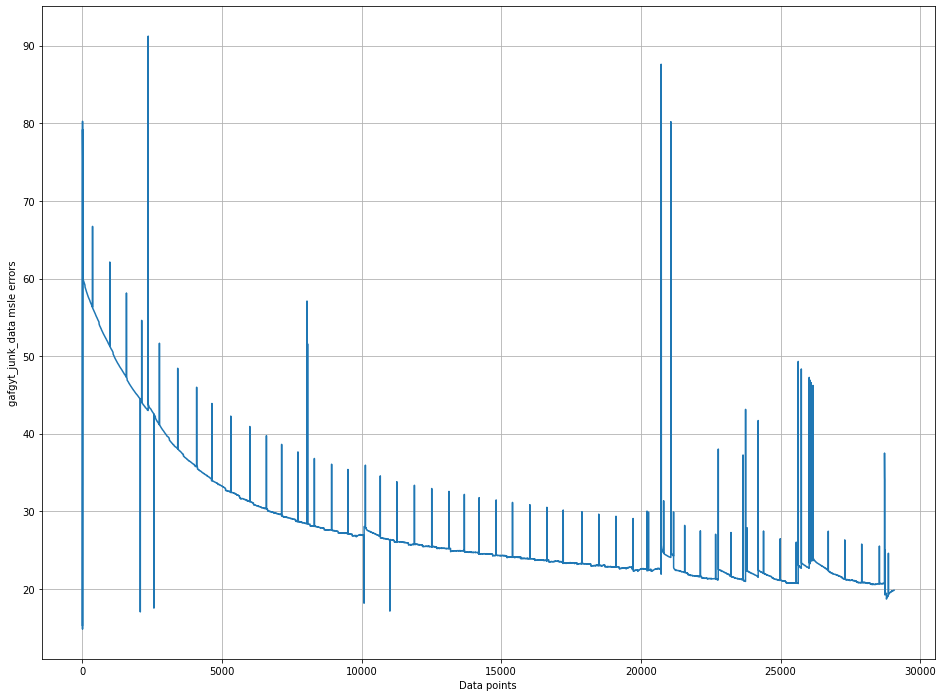

In [ ]:
gafgyt_junk_data_prediction= model.predict(gafgyt_junk_data)

gafgyt_junk_data_prediction_error= tf.keras.losses.msle(gafgyt_junk_data_prediction, gafgyt_junk_data)

gafgyt_junk_data_prediction_label=get_prediction_label(gafgyt_junk_data_prediction_error, threshold)

gafgyt_junk_data_accuracy_score=accuracy_score(gafgyt_junk_data_prediction_label, gafgyt_junk_data_label)

print ('gafgyt_junk_data_accuracy_score_prediction: ', gafgyt_junk_data_accuracy_score)

plt.figure(figsize=(16, 12))
plt.plot(gafgyt_junk_data_prediction_error)
plt.xlabel('Data points')
plt.ylabel('gafgyt_junk_data msle errors')
plt.grid()
plt.show()

### gafgyt_scan_data

The model demonstrates low accuracy in detecting this type of attacks.

gafgyt_scan_data_accuracy_score_prediction:  0.6855841066702402


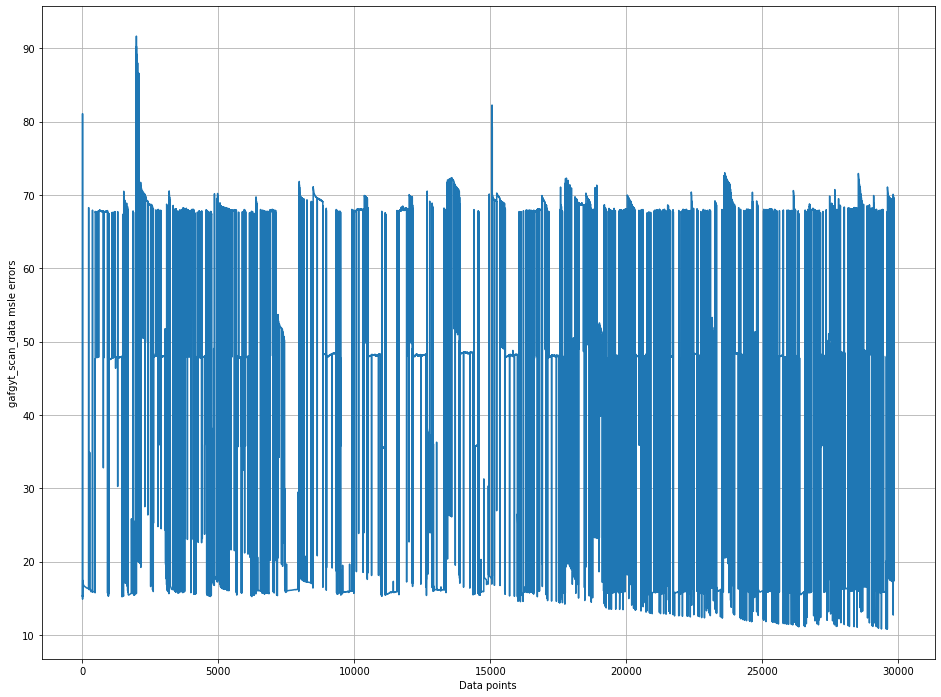

In [ ]:
gafgyt_scan_data_prediction= model.predict(gafgyt_scan_data)

gafgyt_scan_data_prediction_error= tf.keras.losses.msle(gafgyt_scan_data_prediction, gafgyt_scan_data)

gafgyt_scan_data_prediction_label=get_prediction_label(gafgyt_scan_data_prediction_error, threshold)

gafgyt_scan_data_accuracy_score=accuracy_score(gafgyt_scan_data_prediction_label, gafgyt_scan_data_label)

print ('gafgyt_scan_data_accuracy_score_prediction: ', gafgyt_scan_data_accuracy_score)

plt.figure(figsize=(16, 12))
plt.plot(gafgyt_scan_data_prediction_error)
plt.xlabel('Data points')
plt.ylabel('gafgyt_scan_data msle errors')
plt.grid()
plt.show()

### gafgyt_tcp_data

The model is unable to detect this type of attacks.

gafgyt_tcp_data_accuracy_score_prediction:  0.0009767638727602261


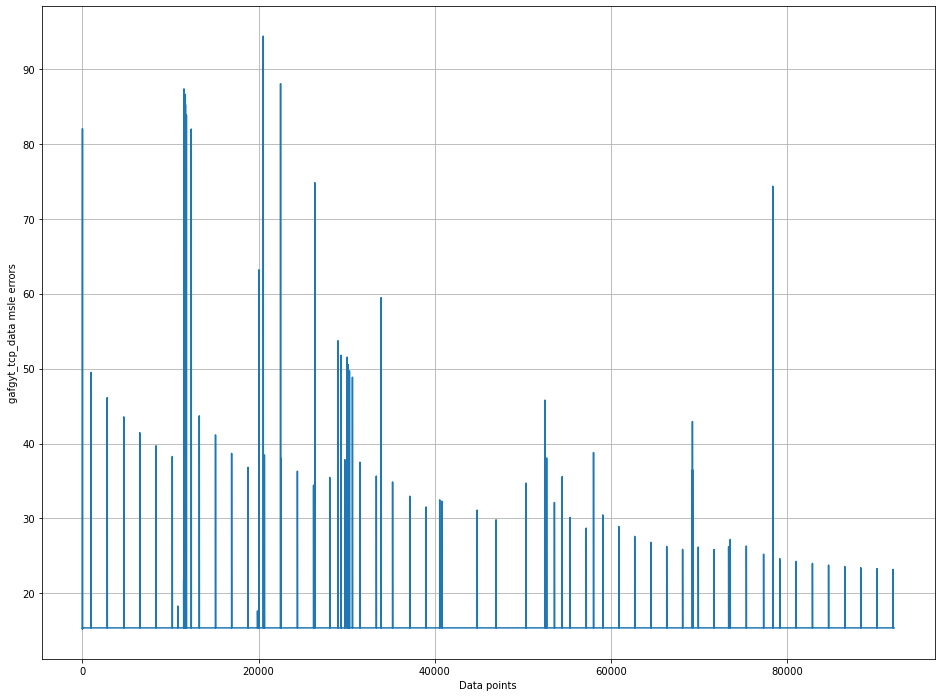

In [ ]:
gafgyt_tcp_data_prediction= model.predict(gafgyt_tcp_data)

gafgyt_tcp_data_prediction_error= tf.keras.losses.msle(gafgyt_tcp_data_prediction, gafgyt_tcp_data)

gafgyt_tcp_data_prediction_label=get_prediction_label(gafgyt_tcp_data_prediction_error, threshold)

gafgyt_tcp_data_accuracy_score=accuracy_score(gafgyt_tcp_data_prediction_label, gafgyt_tcp_data_label)

print ('gafgyt_tcp_data_accuracy_score_prediction: ', gafgyt_tcp_data_accuracy_score)

plt.figure(figsize=(16, 12))
plt.plot(gafgyt_tcp_data_prediction_error)
plt.xlabel('Data points')
plt.ylabel('gafgyt_tcp_data msle errors')
plt.grid()
plt.show()

### gafgyt_udp_data

The model is unable to detect this type of attacks.

gafgyt_udp_data_accuracy_score_prediction:  0.0009539641460604114


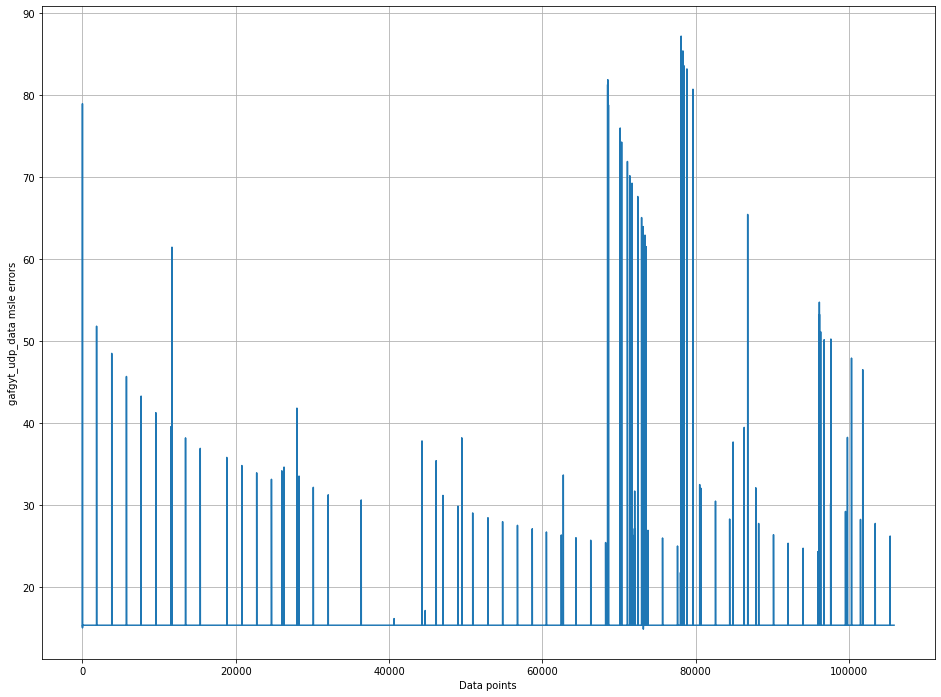

In [ ]:
gafgyt_udp_data_prediction= model.predict(gafgyt_udp_data)

gafgyt_udp_data_prediction_error= tf.keras.losses.msle(gafgyt_udp_data_prediction, gafgyt_udp_data)

gafgyt_udp_data_prediction_label=get_prediction_label(gafgyt_udp_data_prediction_error, threshold)

gafgyt_udp_data_accuracy_score=accuracy_score(gafgyt_udp_data_prediction_label, gafgyt_udp_data_label)

print ('gafgyt_udp_data_accuracy_score_prediction: ', gafgyt_udp_data_accuracy_score)

plt.figure(figsize=(16, 12))
plt.plot(gafgyt_udp_data_prediction_error)
plt.xlabel('Data points')
plt.ylabel('gafgyt_udp_data msle errors')
plt.grid()
plt.show()

# 7. Save the model

In [ ]:
import tempfile
import os

# get the tempfile location for this Colab session
MODEL_DIR = './Save Model'
version = "v1"   # NOTE: Adjust if you don't want to replace a version of your model
export_path = os.path.join(MODEL_DIR, str(version))
print(export_path)

./Save Model/v1


In [ ]:
export_path = os.path.join(MODEL_DIR, str(version))  # the final path includes the version
print('Saving model to : {}\n'.format(export_path))

# if path already exists delete everything at the location
if os.path.isdir(export_path):
    print('\nPreviously saved model found, deleting it\n')
    !rm -r {export_path}

# Save the model
tf.saved_model.save(model, export_path)

# Print save complete message
print(model.summary())
print('Model saved')

Saving model to : ./Save Model/v1


Previously saved model found, deleting it

rm: ./Save: No such file or directory
rm: Model/v1: No such file or directory
INFO:tensorflow:Assets written to: ./Save Model/v1/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 115)               0         
_________________________________________________________________
encoder-dense-114-softplus ( (None, 114)               13224     
_________________________________________________________________
encoder-dense-113-softplus ( (None, 113)               12995     
_________________________________________________________________
encoder-dense-112-softplus ( (None, 112)               12768     
_________________________________________________________________
encoder-dense-111-softplus ( (None, 111)               12543     
_______________________________________

That's a wrap!

Thank you very much for your time and your consideration.
